# Iteration 2

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Understanding

In [46]:
df1 = pd.read_csv('set15_it1.csv')

In [47]:
df2 = pd.read_csv('set15_it2.csv')

In [48]:
df1

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [49]:
df2

,DI,StructuralIntegrity,ExteriorCharm
0,0,4,Common
1,1,8,Common
2,2,5,Common
3,3,6,Common
4,4,6,Common
...,...,...,...
2358,2335,5,Gleaming
2359,2336,6,Common
2360,2337,6,Common
2361,2338,7,Common


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


In [51]:
df2.describe()

,DI,StructuralIntegrity
count,2363.000000,2363.000000
mean,1169.813796,5.563690
std,675.447687,1.103678
min,0.000000,1.000000
25%,584.500000,5.000000
50%,1170.000000,5.000000
75%,1753.500000,6.000000
max,2339.000000,9.000000


In [52]:
df2.sample(5)

,DI,StructuralIntegrity,ExteriorCharm
1623,1607,5,Common
1025,1015,5,Gleaming
20,20,7,Common
986,978,8,Gleaming
1516,1501,9,Gleaming


In [53]:
df2.isna().sum()

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64

In [54]:
df2['ExteriorCharm'].value_counts()

ExteriorCharm
Common        1446
Gleaming       794
Enchanting      96
Modest          27
Name: count, dtype: int64

In [55]:
df2['StructuralIntegrity'].value_counts()

StructuralIntegrity
5    1349
6     421
7     307
8     118
4      82
3      41
9      35
2       7
1       3
Name: count, dtype: int64

In [56]:
df2.loc[df2.duplicated()]

,DI,StructuralIntegrity,ExteriorCharm
61,60,6,Common
309,307,7,Common
391,388,7,Common
509,505,6,Common
522,517,5,Common
526,520,7,Common
599,592,5,Gleaming
660,652,6,Common
991,982,7,Common
1012,1002,5,Gleaming


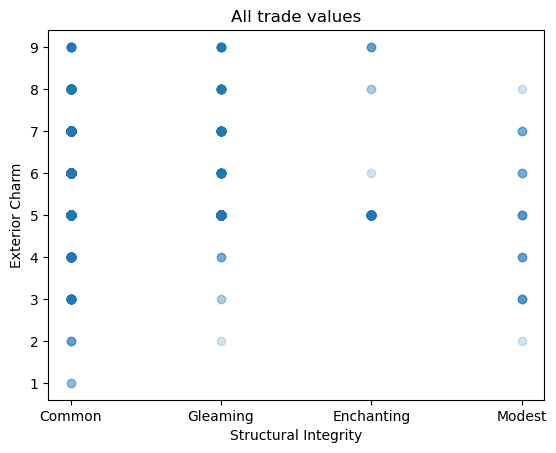

In [57]:
plt.scatter(df2['ExteriorCharm'], df2['StructuralIntegrity'], alpha=0.2)
plt.title('All trade values')
plt.ylabel('Exterior Charm')
plt.xlabel('Structural Integrity')
plt.show()

This should give a nice general idea of how the data is distributed

## 2. Data Preparation

Since there would be a mismatch in row number otherwise, and all the data in this new set looks perfectly fine, we will first merge the datasets before repeating the data prep of iteration 1.

In [58]:
df = df1.merge(df2, left_index=True, right_index=True, how="inner")

In [59]:
df.sample(10)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
30,30,119164.0,GnomeBurough,Petalbridge,1273.0,7628.0,sqft,30,6,Common
1182,1171,224900.0,Meadowlands,Sunspire,1359.0,8158.0,sqft,1171,5,Gleaming
1208,1197,129500.0,GnomeBurough,Wolfsbane,1134.0,2665.0,sqft,1197,7,Common
1790,1772,143000.0,Meadowlands,Crystalhollow,1047.0,14115.0,sqft,1772,5,Common
2133,2113,147110.0,AetherIsles,Wyverncliff,NaN,2403.0,sqft,2113,5,Gleaming
2243,2221,187000.0,Meadowlands,Sunspire,1153.0,12438.0,sqft,2221,5,Gleaming
321,319,79000.0,GnomeBurough,Petalbridge,1107.0,5000.0,sqft,319,4,Common
1281,1270,115000.0,Meadowlands,Emberfall,684.0,8450.0,sqft,1270,5,Common
2320,2297,163990.0,Meadowlands,Sunspire,1119.0,8461.0,sqft,2297,5,Gleaming
94,93,175000.0,Meadowlands,Sunspire,1006.0,10021.0,sqft,93,6,Common


In [60]:
df["ParcelSize"] = df["ParcelSize"].abs()

In [61]:
df['ParcelSize'] = df.apply(lambda x: x['ParcelSize'] * 10.7639 if x['ParcelSizeUnit'] == 'sqm' else x['ParcelSize'], axis=1)

In [62]:
df.replace(to_replace='sqm', value='sqft', inplace=True)

In [63]:
df['TradeValue'] = df.apply(lambda x: x['TradeValue'] * 1000 if x['ParcelSize'] < 1 else x['TradeValue'], axis=1)

In [64]:
df['ParcelSize'] = df['ParcelSize'].apply(lambda x: x * 100000 if x < 1 else x)

In [65]:
df = df[df['TradeValue'] < 700000]

In [66]:
df["Enclave"] = df["Enclave"].str.lower()

In [67]:
df["Enclave"] = df["Enclave"].str.title()

In [68]:
df['Enclave'] = df['Enclave'].str.rstrip('s')

In [70]:
df = df.drop_duplicates()

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df['LivingQuarters'] = df['LivingQuarters'].fillna(df['LivingQuarters'].median())

In [73]:
df.loc[df['LivingQuarters'].isna()]

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm


In [74]:
df.sample(5)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
889,881,131000.0,Meadowlands,Dragonspire,775.0,6860.0,sqft,881,6,Common
586,580,302000.0,Meadowlands,Glimmerwood,2161.0,9572.0,sqft,580,5,Gleaming
1936,1917,116050.0,Meadowlands,Dragonspire,664.0,9353.0,sqft,1917,5,Common
879,871,200000.0,Meadowlands,Windwhisper,1298.0,12798.0,sqft,871,5,Common
1191,1180,99500.0,Meadowlands,Brightforge,706.0,7892.0,sqft,1180,5,Common


In [75]:
df.describe()

,DI_x,TradeValue,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,1169.760479,5.563302
std,675.842382,80164.061659,377.971615,7126.006466,675.842382,1.106856
min,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000
25%,584.250000,129925.000000,883.000000,7427.750000,584.250000,5.000000
50%,1170.500000,160350.000000,1115.000000,9375.000000,1170.500000,5.000000
75%,1754.750000,213000.000000,1326.000000,11509.000000,1754.750000,6.000000
max,2339.000000,625000.000000,4339.000000,164660.000000,2339.000000,9.000000


Since the ParcelSizeUnit column is all just sqft, that column can be deleted and instead ParcelSize should be renamed to clarify that it's in sqft

In [76]:
df.drop(columns=['ParcelSizeUnit'], inplace=True)

In [77]:
df.head()

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common


In [78]:
df.rename(columns={'ParcelSize' : 'ParcelSize (sqft)'}, inplace=True)

In [80]:
df.head(1)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common


In [81]:
monthly_income = 2500

In [82]:
df['MonthlyPayment'] = ((df['TradeValue'] - (df['TradeValue'] * 0.2)) * (1/300) * (1 + (1/300)) ** 360) / ((1 + (1/300)) ** 360 - 1)

In [83]:
df.sample(5)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment
1943,1924,112000.0,Meadowlands,Emberfall,1089.0,25339.0,1924,7,Common,427.764105
594,588,147000.0,Meadowlands,Cloudrest,1115.0,2308.0,588,5,Common,561.440387
1407,1394,186500.0,Meadowlands,Sunspire,1111.0,9750.0,1394,5,Gleaming,712.303621
253,252,119000.0,Meadowlands,Dragonspire,759.0,13587.0,252,5,Common,454.499361
2042,2022,256000.0,Meadowlands,Windwhisper,1279.0,53227.0,2022,6,Common,977.746525


In [84]:
df.describe()

,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,1169.760479,5.563302,693.313267
std,675.842382,80164.061659,377.971615,7126.006466,675.842382,1.106856,306.172393
min,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,584.250000,129925.000000,883.000000,7427.750000,584.250000,5.000000,496.225458
50%,1170.500000,160350.000000,1115.000000,9375.000000,1170.500000,5.000000,612.428341
75%,1754.750000,213000.000000,1326.000000,11509.000000,1754.750000,6.000000,813.515663
max,2339.000000,625000.000000,4339.000000,164660.000000,2339.000000,9.000000,2387.076477


In [85]:
df['AffordableDwelling'] = df['MonthlyPayment'] <= (monthly_income * 0.30)

In [86]:
df.sample(5)

,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
1253,1242,197900.0,Meadowlands,Nighthaven,1326.0,17871.0,1242,5,Common,755.843896,False
914,906,113722.0,Meadowlands,Brightforge,1163.0,7007.0,906,5,Common,434.340978,True
2051,2031,233555.0,Meadowlands,Sunspire,1419.0,13377.0,2031,5,Gleaming,892.021835,False
1583,1568,189500.0,Meadowlands,Duskwood,1253.0,7984.0,1568,5,Gleaming,723.761588,True
2228,2206,109900.0,Meadowlands,Shadowmere,955.0,17808.0,2206,5,Common,419.743528,True


In [87]:
df.describe()

,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,1169.760479,5.563302,693.313267
std,675.842382,80164.061659,377.971615,7126.006466,675.842382,1.106856,306.172393
min,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,584.250000,129925.000000,883.000000,7427.750000,584.250000,5.000000,496.225458
50%,1170.500000,160350.000000,1115.000000,9375.000000,1170.500000,5.000000,612.428341
75%,1754.750000,213000.000000,1326.000000,11509.000000,1754.750000,6.000000,813.515663
max,2339.000000,625000.000000,4339.000000,164660.000000,2339.000000,9.000000,2387.076477


In [88]:
df["AffordableDwelling"].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64